# Kaggle Comptetition - Cuisine Predictor

The Goal of this competition is to  predict the genre of cusine given the ingredients in a particular dish.

First, we will import any relevant packages

In [16]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, Perceptron
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM, MLPRegressor

Let's read the data and see what it looks like

In [3]:
test_data = pd.read_json('test.json')

train_data = pd.read_json('train.json')
test_data.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [4]:
train_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


Let's do an initial but brief data analysis to see what the data is telling us. We will construct a historgram of occurences for each genre possible in the data.

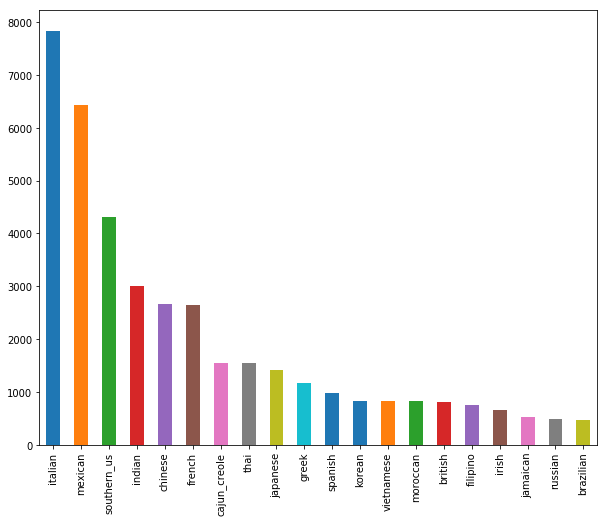

In [30]:
cuisine_counts = pd.Series(train_data['cuisine']).value_counts().plot(kind = 'bar', figsize = (10,8))

# ML Application - Read Data and Vectorize into a Matrix (Binary) for whether or not a particular ingredient is in a genre of food

In [6]:
import json

train = json.load(open('../CuisinePrediction/train.json'))
validation = json.load(open('../CuisinePrediction/test.json'))

train_set = [" ".join(i['ingredients']).lower() for i in train]
test_set = [" ".join(i['ingredients']).lower() for i in validation]

In [7]:
y_train = [i['cuisine'] for i in train]
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [8]:
cv = TfidfVectorizer(binary=True)
X_Train = cv.fit_transform(train_set)
X_Test = cv.transform(test_set)

X_Train.shape

(39774, 3010)

# Split the Data into a Training and Test set

In [9]:
feature_matrix_train, feature_matrix_test, target_train, target_test = train_test_split(X_Train, 
                                                                                        y_train, 
                                                                                        test_size=0.25)

I commented this section out, but this portion allowed me to compare various supervised learning algorithms and get an idea of which algorith to focus on.

In [10]:
# models = []
# # models.append(('RFC', RandomForestClassifier()))
# # models.append(('DTC', DecisionTreeClassifier()))
# # models.append(('MNB', MultinomialNB()))
# models.append(('LGR', LogisticRegression(C=10, dual=False)))
# # models.append(('LDA', LinearDiscriminantAnalysis()))
# # models.append(('BNB', BernoulliNB()))
# # models.append(('KNN', KNeighborsClassifier(n_neighbors=)))
# # models.append(('GBC', GradientBoostingClassifier()))
# # models.append(('LGRCV', LogisticRegressionCV()))
# # models.append(('SVC', SVC()))

# results = []
# names = []
# scoring = 'accuracy'

# for name, model in models:
#     kfold = model_selection.KFold(n_splits=10, random_state=7)
#     cv_results = model_selection.cross_val_score(model, feature_matrix_train, target_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)


Commented out, Used to obtain the optimal parameters for using Logistic Regression when fitting the data.

In [11]:
# rf_clf = LogisticRegression()
# params = {
# #             "n_neighbors" : np.arange(5,50,10),
# #             "algorithm" : ['ball_tree', 'kd_tree', 'auto'],
# #             "leaf_size" : np.arange(30,50,10)
# #         "multi_class" : ['ovr', 'crammer_singer'],
# #         "fit_intercept" : ['True', 'False']
#     "C" : np.arange(5,15,2),
#     "solver": ['lbfgs', 'sag', 'saga'],
#     "fit_intercept" : [True, False],
#     "warm_start": ['True', 'False'],
#     "max_iter": np.arange(50,200,10)
# } 

# rf_grid = GridSearchCV(rf_clf, params)
# start = time.time()
# rf_grid.fit(feature_matrix_train, target_train)

# print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))

# #acc = grid.score(feature_matrix_test, target_test)
# acc = rf_grid.best_score_
# print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
# print("[INFO] randomized search best parameters: {}".format(rf_grid.best_params_))

In [29]:
# vote_clf=VotingClassifier(estimators=[('clf1',LogisticRegression(max_iter=60,  
#                          C = 5,
#                          dual = True,
#                          warm_start=True, 
#                          fit_intercept = True)),
#                          ('clf2',LinearSVC(C=10))],
#                          voting='soft',weights=[1,2])
# vote_clf.fit(feature_matrix_train , target_train)
# vote_clf.score(feature_matrix_test, target_test)

# vote_clf=VotingClassifier(estimators=[('clf1',LogisticRegression(max_iter=60,  
#                          C = 5,
#                          dual = True,
#                          warm_start=True, 
#                          fit_intercept = True)),
#                          ('clf2', DecisionTreeClassifier())],
#                          voting='soft',weights=[1,2])
# vote_clf.fit(feature_matrix_train , target_train)
# vote_clf.score(feature_matrix_test, target_test)




/Users/meyern/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6188656476267096

# We use a Voting classifier comparing Logistic Regression and SVM's for each class

In [23]:
clf = VotingClassifier(estimators=[('clf1',LogisticRegression(max_iter=60,  
                         C = 5,
                         dual = True,
                         warm_start=True, 
                         fit_intercept = True)),
                         ('clf2',SVC(C=10,kernel='rbf',gamma = 1, probability=True))],
                         voting='soft',weights=[1,2])


clf.fit(X_Train, y_train)

y_pred = clf.predict(X_Test)
y_pred = LE.inverse_transform(y_pred)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [ ]:
val_id = [i['id'] for i in validation]
submission = pd.DataFrame({'id':val_id, 'cuisine':y_pred}, columns=['id', 'cuisine'])
submission.to_csv('attempt_6.csv', index=False)